<a href="https://www.kaggle.com/code/tolgatanrisever/world-happiness-report-eda-ml?scriptVersionId=117356094" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


In [2]:
train_df=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
train_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
train_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [5]:
train_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [7]:
train_df21=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")

In [8]:
train_df21

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [9]:
train_df21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
train_df21["Country name"].value_counts()

Finland         1
Ghana           1
Turkmenistan    1
Gambia          1
Benin           1
               ..
Latvia          1
Colombia        1
Hungary         1
Thailand        1
Afghanistan     1
Name: Country name, Length: 149, dtype: int64

In [11]:
train_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [12]:
train_df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [13]:
train_df21.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [14]:
#%%numeric var 
def categorical(train_df):
    global cat_col
    cols=train_df.columns
    num_cols = train_df._get_numeric_data().columns
    cols=train_df.columns
    cat_col=list(set(cols) - set(num_cols)) 
    return cat_col

#%%categorical var 
def numerical(train_df):
    num_cols = train_df._get_numeric_data().columns
    return num_cols

def prob_his(train_df,variable_x,variable_y):
    fig = px.histogram(train_df,x = variable_x, y = variable_y,color=variable_x,histfunc='avg',marginal='box',barmode='overlay',title=variable_x, width=700, height=500)
    fig.update_layout(bargap=0.1,barmode='stack')
    fig.show()
    fig1 = px.box(train_df, x=variable_x, y=variable_y,color=variable_x,width=700,height=500,)
    fig1.update_traces(quartilemethod="exclusive")
    fig1.show()
    
def hisplot(variable):
    fig = px.histogram(train_df21,
                       x=variable,
                       color=variable,
                       title=variable,
                       width=700,
                       height=500,
                       barmode='overlay'
                       )
    fig.update_layout(bargap=0.1,barmode='stack', xaxis={'categoryorder': 'total descending'})
   
    fig.show()
def histogram(variable_x):
    fig = px.histogram(train_df21,x=variable_x,marginal='box',title=variable_x, width=700, height=500,color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.1)
    fig.show()
#%% visualize_scattter
def scatter_p(train_df,variable_x,variable_y):
    fig = px.scatter(train_df,x=variable_x,y=variable_y,title=variable_x,width=700,height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable_x)
    fig.show()

In [15]:
cat_value=categorical(train_df21)
num_value=numerical(train_df21)


In [16]:
cat_value

['Regional indicator', 'Country name']

In [17]:
num_value

Index(['Ladder score', 'Standard error of ladder score', 'upperwhisker',
       'lowerwhisker', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [18]:
train_df21.value_counts("Regional indicator")

Regional indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
dtype: int64

In [19]:
variable_x="Regional indicator"
hisplot(variable_x)

In [20]:
variable_x="Regional indicator"
fig = px.histogram(train_df21,x = variable_x,color=variable_x,barmode='overlay',title=variable_x, width=700, height=500)
fig.update_layout(bargap=0.1,barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [21]:
variable_x='Regional indicator'
variable_y='Ladder score'
fig = px.histogram(train_df21,x = variable_x, y = variable_y,color=variable_x,histfunc='avg',marginal='box',barmode='overlay',title=variable_x, width=700, height=500)
fig.update_layout(bargap=0.1,barmode='stack')
fig.show()

In [22]:
variable_x='Country name'
variable_y='Ladder score'
fig = px.histogram(train_df21,x = variable_x, y = variable_y,color=variable_x,histfunc='avg',marginal='box',barmode='overlay',title=variable_x, width=700, height=500)
fig.update_layout(bargap=0.1,barmode='stack')
fig.show()

In [23]:
y="Ladder score"
for i in num_value:
    scatter_p(train_df21,i,y)

In [24]:
for i in num_value:
    histogram(i)

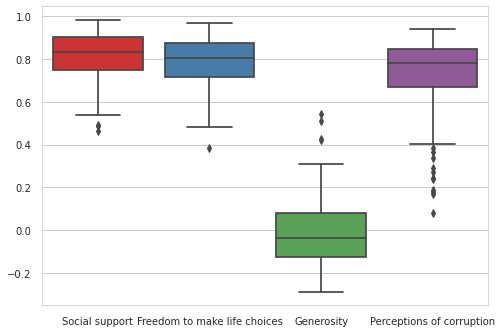

In [25]:
# distribution of feature set 1
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = train_df21.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

In [26]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(
    y=train_df21["Social support"],
    name="Social support",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='outliers', # represent all points
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)'
))

fig.add_trace(go.Box(
    y=train_df21["Freedom to make life choices"],
    name="Freedom to make life choices",
    boxpoints="all", # no data points
    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=train_df21["Generosity"],
    name="Generosity",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=train_df21["Perceptions of corruption"],
    name="Perceptions of corruption",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))


fig.update_layout(title_text="Box Plot Styling Outliers")
fig.show()

In [27]:
fig = px.histogram(train_df21, x="Ladder score", color="Regional indicator", marginal="rug")
fig.show()

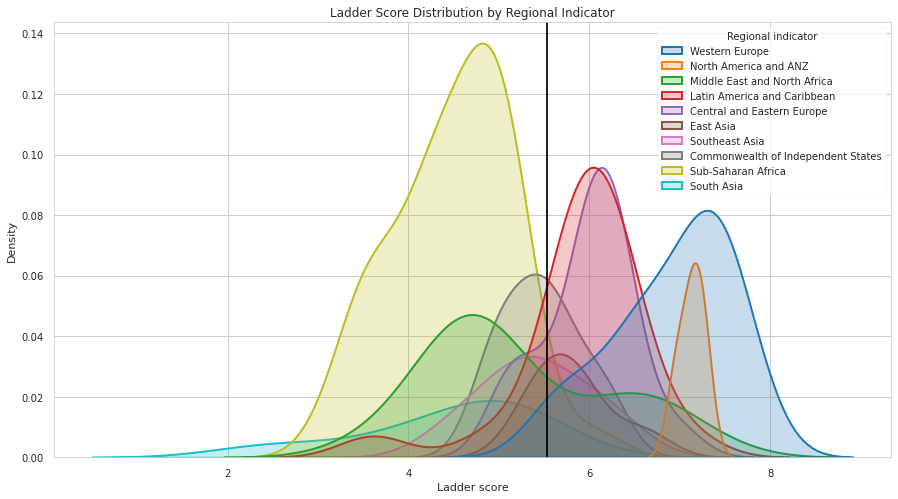

In [28]:
plt.figure(figsize = (15,8))
sns.kdeplot(train_df21["Ladder score"], hue = train_df21["Regional indicator"], fill = True, linewidth = 2)
plt.axvline(train_df21["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

In [29]:
fig = px.choropleth(train_df.sort_values("year"), 
                    locations = "Country name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

In [30]:
train_df21.Generosity

0     -0.098
1      0.030
2      0.025
3      0.160
4      0.175
       ...  
144   -0.131
145   -0.246
146    0.061
147   -0.047
148   -0.102
Name: Generosity, Length: 149, dtype: float64

In [31]:
fig = px.bar(train_df21.sort_values("Generosity"), x="Generosity", y="Country name", orientation='h')
fig.show()

In [32]:
fig = px.choropleth(train_df.sort_values("year"), 
                    locations = "Country name", 
                    color = "Generosity",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

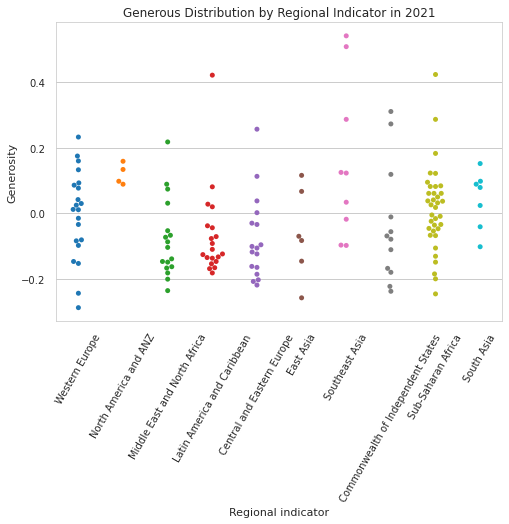

In [33]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = train_df21)
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

In [34]:

fig = px.pie(train_df21, values='Generosity', names='Regional indicator', title='Generous Distribution by Regional Indicator in 2021')
fig.show()

In [35]:
pop = pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [36]:
country_continent = {}
for i in range(len(train_df21)):
    country_continent[train_df21["Country name"][i]] = train_df21["Regional indicator"][i]
all_countries = train_df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_2021 = train_df21["Country name"].value_counts().reset_index()["index"].tolist()

for x in all_countries:
    if x not in all_countries_2021:
        print(x)

Congo (Kinshasa)
Syria
Trinidad and Tobago
Sudan
Qatar
Central African Republic
Somaliland region
Djibouti
South Sudan
Angola
Bhutan
Somalia
Belize
Suriname
Cuba
Oman
Guyana


In [37]:
region = []
for i in range(len(train_df)):
    if train_df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif train_df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif train_df['Country name'][i] == 'Congo (Kinshasa)':
        region.append("Sub-Saharan Africa")
    elif train_df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif train_df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif train_df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif train_df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif train_df['Country name'][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif train_df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif train_df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif train_df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif train_df['Country name'][i] == 'South Sudan':
        region.append("Middle East and North Africa")
    elif train_df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif train_df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif train_df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif train_df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif train_df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif train_df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[train_df['Country name'][i]])
        
train_df["region"] = region

In [38]:
train_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Sub-Saharan Africa
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Sub-Saharan Africa
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Sub-Saharan Africa
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,Sub-Saharan Africa


In [39]:
all_countries = train_df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_pop = pop["Country Name"].value_counts().reset_index()["index"].tolist()

del_cou = []
for x in all_countries:
    if x not in all_countries_pop:
        del_cou.append(x)
del_cou

['Egypt',
 'South Korea',
 'Kyrgyzstan',
 'Russia',
 'Venezuela',
 'Palestinian Territories',
 'Taiwan Province of China',
 'Iran',
 'Yemen',
 'Slovakia',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Laos',
 'Congo (Kinshasa)',
 'Syria',
 'North Cyprus',
 'Somaliland region',
 'Swaziland',
 'Gambia']

In [40]:
pop_df = train_df[['Log GDP per capita', 'Life Ladder', 'Country name', 'year', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',"region",'Perceptions of corruption']].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776


In [41]:
pop_df = pop_df[~pop_df["Country name"].isin(del_cou)]
pop_df = pop_df[~pop_df.year.isin([2006,2005,2007,2018,2019,2020,2021])]
pop_dict = {x:{} for x in range(2008,2018)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008,2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]] = pop["Count"][i]

In [42]:
population = []
for i in pop_df.index:
    population.append(pop_dict[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["population"] = population

In [43]:
fig = px.scatter(pop_df, 
                 x = "Log GDP per capita",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "population",
                 template = "plotly_white",
                 color = "region", 
                 hover_name = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year")
fig.show()

In [44]:
fig = px.scatter(pop_df, 
                 x = "Freedom to make life choices",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "population",
                 template = "plotly_dark",
                 color = "region", 
                 hover_name = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Life Ladder and Freedom Comparison by Countries via Regions for each Year")
fig.show()

In [45]:
fig = px.scatter(pop_df, 
                 x = "Perceptions of corruption",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "population",
                 color = "region", 
                 hover_name = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Life Ladder and Corruption Comparison by Countries via Regions for each Year")
fig.show()

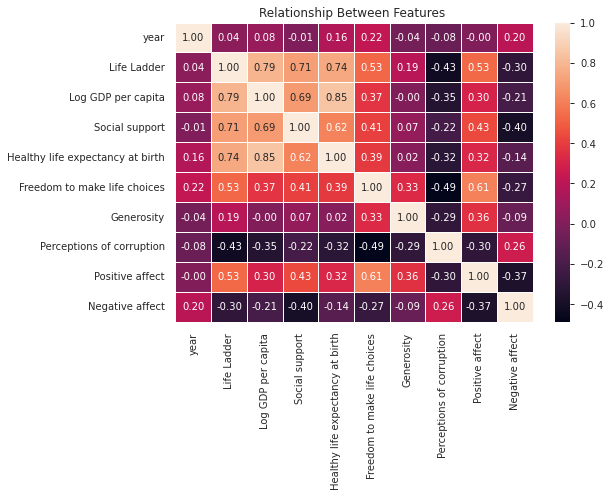

In [46]:
sns.heatmap(train_df.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

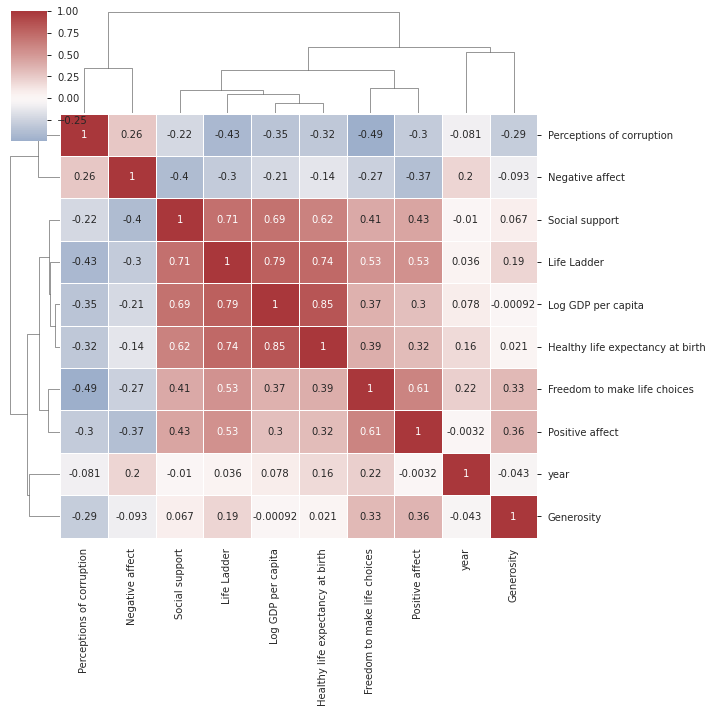

In [47]:
sns.clustermap(train_df.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(10,10))
plt.show()